In [1]:
#Declare packages and import dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

datapath = "../data/"
df = pd.read_csv(datapath + "/pima-data.csv")

print(df.shape)
df.head(5)

(768, 10)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
#function to calculate correlated data in matrix
def plot_correlated_data(df, size=10):
    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


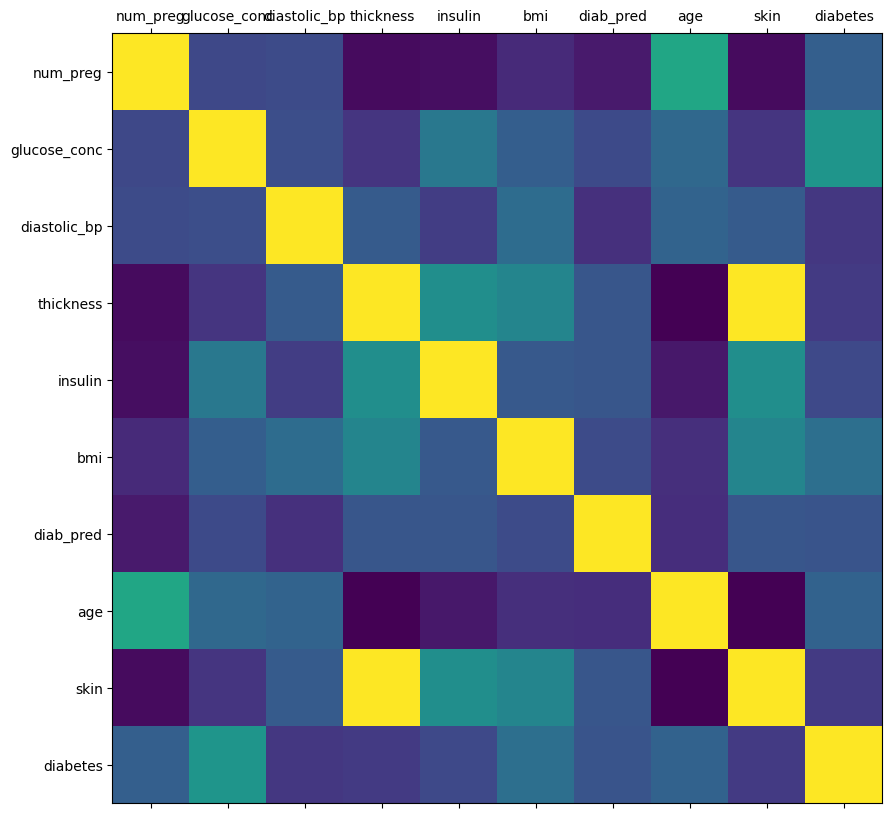

In [4]:
plot_correlated_data(df)
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


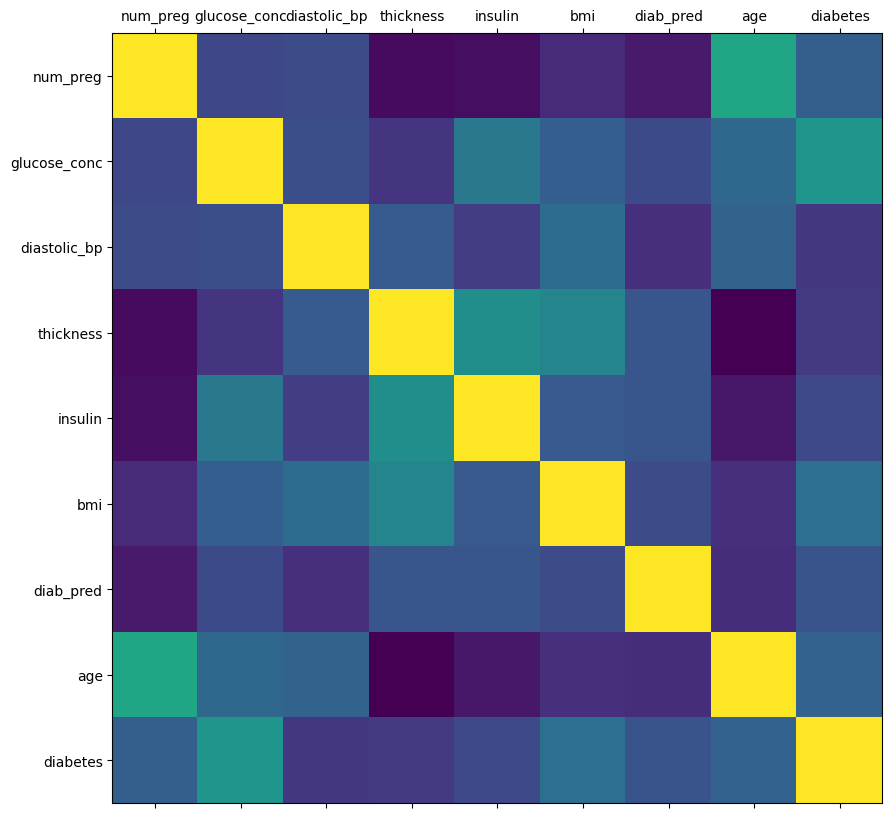

In [5]:
#remove correlated column/s
del df['skin']
plot_correlated_data(df)
df.corr()

In [6]:
#map boolian values to numbers
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#check output values percentages
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [8]:
# Split Data
# 70% training and 30% testing

from sklearn.model_selection import train_test_split

feature_column_names = ["num_preg","glucose_conc","diastolic_bp","thickness","insulin","bmi","diab_pred","age"]
predicted_class_names = ["diabetes"]
x = df[feature_column_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = split_test_size, random_state = 69)

print("{0:0.2f}% in training set".format((len(x_train)/ len(df.index)) * 100))
print("{0:0.2f}% in testing set".format((len(x_test)/ len(df.index)) * 100))

ModuleNotFoundError: No module named 'sklearn'

In [9]:
#verifying predicted value

print("Original true: {0} ({1:0.2f}%)".format(len(df.loc[df["diabetes"] == 1]), (len(df.loc[df["diabetes"] == 1])/len(df.index) * 100)))
print("Original false: {0} ({1:0.2f}%)".format(len(df.loc[df["diabetes"] == 0]), (len(df.loc[df["diabetes"] == 0])/len(df.index) * 100)))
print("")
print("Train true: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100)))
print("Train false: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100)))
print("")
print("Test true: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100)))
print("Test false: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100)))


Original true: 268 (34.90%)
Original false: 500 (65.10%)



NameError: name 'y_train' is not defined

In [10]:
#post split operations

## Find empty values (which might not be 0)
print("Total rows : {0}".format(len(df)))
print("Total rows missing for glucose_conc : {0}".format(len(df.loc[df["glucose_conc"] == 0])))
print("Total rows missing for diastolic_bp : {0}".format(len(df.loc[df["diastolic_bp"] == 0])))
print("Total rows missing for thickness : {0}".format(len(df.loc[df["thickness"] == 0])))
print("Total rows missing for insulin : {0}".format(len(df.loc[df["insulin"] == 0])))
print("Total rows missing for bmi : {0}".format(len(df.loc[df["bmi"] == 0])))
print("Total rows missing for diab_pred : {0}".format(len(df.loc[df["diab_pred"] == 0])))
print("Total rows missing for age : {0}".format(len(df.loc[df["age"] == 0])))

Total rows : 768
Total rows missing for glucose_conc : 5
Total rows missing for diastolic_bp : 35
Total rows missing for thickness : 227
Total rows missing for insulin : 374
Total rows missing for bmi : 11
Total rows missing for diab_pred : 0
Total rows missing for age : 0


In [11]:
#Imputing missing data (replace it with mean values)
from sklearn.preprocessing import Imputer 
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)
  

ModuleNotFoundError: No module named 'sklearn'

In [12]:
#traning algorithm using Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

ModuleNotFoundError: No module named 'sklearn'

In [13]:
#performance on training data
nb_predict_train = nb_model.predict(x_train)

#predict values using training data
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

NameError: name 'nb_model' is not defined

In [35]:
#performance on testing data
nb_predict_test = nb_model.predict(x_test)

#predict values using training data
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7013


In [36]:
#Metrices
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
# first column predicted false and Second column predicted true
# first row actual false and Second column actual true
#  [[TN FP]
#  [FN TP]]
# True Negative(TN): Actual not dibetis and predicted as not dibetis
# False Positive(FP): Actual not dibetis and predicted as dibetis
# True Positive(TP): Actual dibetis and predicted as dibetis 
# False Negative(FN): Actual dibetis and predicted as not dibetis
#
# Perfect Classifier
# [[151, 0]
#  [0, 80]]

print("")
 
print("Classification Reports")
print("{0}".format(metrics.classification_report(y_test, nb_predict_test)))

# Recall is True Positive rate and sensitivity: recall(for row 2) = TP/ (TP + FN) 
# Precision is positive predicted value: precision(for row 2) = TP/ (TP + FN)

Confusion Matrix
[[118  30]
 [ 39  44]]

Classification Reports
             precision    recall  f1-score   support

          0       0.75      0.80      0.77       148
          1       0.59      0.53      0.56        83

avg / total       0.70      0.70      0.70       231



In [37]:
#Random forest => overfitting (Learn training data to well)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=69)
rf_model.fit(x_train, y_train.ravel())


rf_predict_train = rf_model.predict(x_train)
#training metrices
print("Accuracy(Train): {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))

rf_predict_test = rf_model.predict(x_test)
#tesing metrices
print("Accuracy(Test): {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))

Accuracy(Train): 0.9758
Accuracy(Test): 0.7056


In [38]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Reports")
print("{0}".format(metrics.classification_report(y_test, rf_predict_test)))

Confusion Matrix
[[120  28]
 [ 40  43]]

Classification Reports
             precision    recall  f1-score   support

          0       0.75      0.81      0.78       148
          1       0.61      0.52      0.56        83

avg / total       0.70      0.71      0.70       231



In [39]:
#Improve performance with Logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=69)
# C: Regulaization hyperpoint
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("Accuracy(Test): {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print("")
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")
print("Classification Reports")
print("{0}".format(metrics.classification_report(y_test, lr_predict_test)))

Accuracy(Test): 0.7706

Confusion Matrix
[[134  14]
 [ 39  44]]

Classification Reports
             precision    recall  f1-score   support

          0       0.77      0.91      0.83       148
          1       0.76      0.53      0.62        83

avg / total       0.77      0.77      0.76       231



lst max values of 0.554 occurred at C=1.500


Text(0,0.5,'Recall Scores')

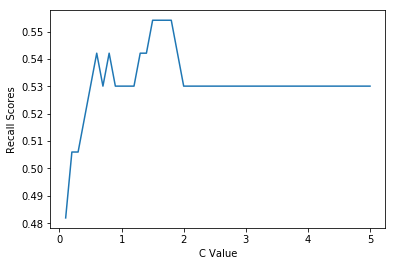

In [40]:
#Recall value still not 70%

#Setting regularization parameter
c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []
c_val = c_start
best_recall_score =0 

while(c_val < c_end):
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C = c_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    c_val = c_val + c_inc 
    
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("lst max values of {0:.3f} occurred at C={1:.3f}".format(best_recall_score, best_score_c_val))

%matplotlib inline
plt.plot(c_values, recall_scores,"-")
plt.xlabel("C Value")
plt.ylabel("Recall Scores")

lst max values of 0.783 occurred at C=0.300


Text(0,0.5,'Recall Scores')

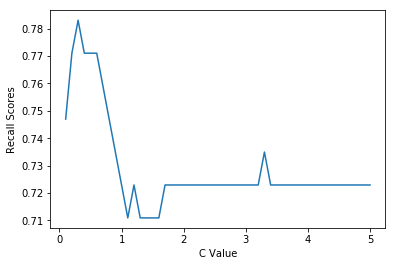

In [41]:
# we still not get Recall over 70% (Our data has more non-dibetis data than dibetis), unbalanced data
 
#Fixing unbalanced data
c_start = 0.1
c_end = 5
c_inc = 0.1

c_values, recall_scores = [], []
c_val = c_start
best_recall_score =0 

while(c_val < c_end):
    c_values.append(c_val)
    lr_model_loop = LogisticRegression(C = c_val, class_weight="balanced", random_state=69)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    c_val = c_val + c_inc 
    
best_score_c_val = c_values[recall_scores.index(best_recall_score)]
print("lst max values of {0:.3f} occurred at C={1:.3f}".format(best_recall_score, best_score_c_val))

%matplotlib inline
plt.plot(c_values, recall_scores,"-")
plt.xlabel("C Value")
plt.ylabel("Recall Scores")

In [42]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight="balanced", C=best_score_c_val, random_state=69)
# C: Regulaization hyperpoint
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("Accuracy(Test): {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print("")
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")
print("Classification Reports")
print("{0}".format(metrics.classification_report(y_test, lr_predict_test)))
print(metrics.recall_score(y_test,lr_predict_test))

Accuracy(Test): 0.7316

Confusion Matrix
[[104  44]
 [ 18  65]]

Classification Reports
             precision    recall  f1-score   support

          0       0.85      0.70      0.77       148
          1       0.60      0.78      0.68        83

avg / total       0.76      0.73      0.74       231

0.78313253012


In [43]:
# Now we have achieved 70% recall value and we need other data for tuning(other than test data) 
# for cross validation

# we can use K-fold validation

from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state = 69, Cs=3, cv=10, refit = False, class_weight="balanced")
# n_jobs= -1 => Use all core on the system
# cv=10 => number of folds are 10
#
lr_cv_model.fit(x_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(x_test)

print("Accuracy(Test): {0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))
print("")
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")
print("Classification Reports")
print("{0}".format(metrics.classification_report(y_test, lr_cv_predict_test)))

#Slightly below 70% but will be better for real world data

Accuracy(Test): 0.7229

Confusion Matrix
[[104  44]
 [ 18  65]]

Classification Reports
             precision    recall  f1-score   support

          0       0.81      0.74      0.77       148
          1       0.60      0.69      0.64        83

avg / total       0.73      0.72      0.73       231

